In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
!pip install wordcloud


In [56]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [4]:
# KERAS
SEQUENCE_LENGTH =300
EPOCHS = 8
BATCH_SIZE = 1024

In [22]:
import re
from wordcloud import WordCloud, STOPWORDS 


DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

In [38]:
df=pd.read_csv("/home/rishabh/NLP/hate speech/data.csv",encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [39]:
df.shape

(1600000, 6)

In [40]:
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [41]:
df[df['target']==0]

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
799995,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...
799996,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,Gmail is down?
799997,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad
799998,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...


In [42]:
df[df['target']==4]

,target,ids,date,flag,user,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [43]:
df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [44]:
decode_map = {0: "HATE", 4: "NON HATE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [45]:
df.target = df.target.apply(lambda x: decode_sentiment(x))


In [46]:
df['target'].unique()

array(['HATE', 'NON HATE'], dtype=object)

In [48]:
df.head(5)

,target,ids,date,flag,user,text
0,HATE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,HATE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,HATE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,HATE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,HATE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [49]:
stop_words=stopwords.words("english")
stemmer = SnowballStemmer("english",ignore_stopwords=True)

In [50]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
#train_df= train_df.iloc[1900:2000,:]

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text,stem= True):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(stemmer.stem(token))
            

    return " ".join(tokens)

In [ ]:
df.text = df.text.apply(lambda x: preprocess(x))


In [54]:
df.head(15)

,target,ids,date,flag,user,text
0,HATE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day
1,HATE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset updat facebook text might cri result sch...
2,HATE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dive mani time ball manag save 50 rest go bound
3,HATE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
4,HATE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behav mad see
5,HATE,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,whole crew
6,HATE,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need hug
7,HATE,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,hey long time see yes rain bit bit lol fine thank
8,HATE,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,nope
9,HATE,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,que muera


In [58]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 1280000
TEST size: 320000


In [59]:
documents = [text.split() for text in df_train.text] 
documents

[['ya',
  'quot',
  'like',
  'palm',
  'pre',
  'touchston',
  'charger',
  'readynow',
  'yes',
  'sound',
  'good',
  'beer',
  'readi',
  'prelaunch'],
 ['felt', 'earthquak', 'afternoon', 'seem', 'epicent'],
 ['ruffl', 'shirt', 'like', 'likey'],
 ['pretti',
  'bad',
  'night',
  'crappi',
  'morn',
  'fml',
  'buttfac',
  'didnt',
  'say',
  'could',
  'go',
  'work',
  'today'],
 ['yeah', 'clear', 'view'],
 ['one',
  'time',
  'follow',
  'fam',
  'ff',
  'georgeann13',
  'nakithebeatman',
  'flimackgod',
  'chaz81',
  'djt',
  'ell',
  'jaejaedynomit',
  'welcom',
  'friday',
  'follow',
  '2'],
 ['u', 'rock', 'thank', 'ad', 'next', 'robcrotch', 'tm', 'video'],
 ['yes',
  'pleas',
  'met',
  'fiance',
  'ian',
  'parti',
  'day',
  'btw',
  'sweet',
  'congrat',
  'guy'],
 ['gawd',
  'finish',
  'whole',
  'bowl',
  'even',
  'post',
  'previous',
  'tweet',
  'make',
  '2nd',
  'bowl'],
 ['awesom', 'game', 'short', 'finish', 'crave', 'god', 'war', 'action'],
 ['happi',
  'mother

In [64]:
model = Word2Vec(documents)
words = model.wv.vocab
words

{'ya': <gensim.models.keyedvectors.Vocab at 0x7f2dc51a0390>,
 'quot': <gensim.models.keyedvectors.Vocab at 0x7f2dc51a0c10>,
 'like': <gensim.models.keyedvectors.Vocab at 0x7f2dc51ab6d0>,
 'palm': <gensim.models.keyedvectors.Vocab at 0x7f2dc51ab250>,
 'pre': <gensim.models.keyedvectors.Vocab at 0x7f2dc5141f50>,
 'touchston': <gensim.models.keyedvectors.Vocab at 0x7f2dc51af310>,
 'charger': <gensim.models.keyedvectors.Vocab at 0x7f2dc51af3d0>,
 'yes': <gensim.models.keyedvectors.Vocab at 0x7f2dc51af490>,
 'sound': <gensim.models.keyedvectors.Vocab at 0x7f2dc51ab1d0>,
 'good': <gensim.models.keyedvectors.Vocab at 0x7f2dc51af410>,
 'beer': <gensim.models.keyedvectors.Vocab at 0x7f2dc51af250>,
 'readi': <gensim.models.keyedvectors.Vocab at 0x7f2dc51af350>,
 'prelaunch': <gensim.models.keyedvectors.Vocab at 0x7f2dc51af290>,
 'felt': <gensim.models.keyedvectors.Vocab at 0x7f2dc51af110>,
 'earthquak': <gensim.models.keyedvectors.Vocab at 0x7f2dc51af650>,
 'afternoon': <gensim.models.keyedvecto

In [65]:
print("vocabulary size")
len(words)

vocabulary size


37799

In [66]:
vector = model.wv['king']
vector.shape,vector

((100,),
 array([-0.36862445,  0.5323273 ,  0.21988317,  1.0600568 ,  0.20131972,
        -1.6265092 ,  2.0236053 ,  1.2514658 , -0.3620582 ,  0.70492226,
        -0.7440958 , -1.4830747 ,  0.86304456, -0.70760655,  0.09521224,
        -0.4331915 ,  0.5598995 ,  1.6468387 , -0.60766476, -0.117546  ,
         0.7527266 , -0.27076042, -1.6754333 ,  0.42296344, -0.47410783,
        -1.1728683 ,  0.6484892 , -0.20211878, -0.9484978 , -0.8366804 ,
         0.8363385 , -0.63212043, -0.21504067,  0.86053383, -0.13364951,
        -0.3258137 ,  1.6913437 ,  1.642946  , -0.08121882,  0.37368357,
         0.04489112,  0.04719063,  0.6436246 , -0.05705754,  0.6997639 ,
        -0.52202827,  0.6862855 , -0.6327341 ,  0.42204168, -1.008407  ,
         0.21175602,  0.736039  ,  0.67865545, -0.66521096,  0.36876965,
         0.7691384 , -0.7062088 , -0.05424611,  0.42824194,  1.1807207 ,
        -0.51456094, -0.6697268 , -0.68668413,  1.1226722 ,  0.8062774 ,
         0.25345156,  0.4434897 , -0.29673

In [67]:
model.wv.most_similar('kill')


[('stab', 0.6192469000816345),
 ('die', 0.6135509014129639),
 ('slit', 0.5421093702316284),
 ('scratch', 0.5362467169761658),
 ('hurt', 0.5319745540618896),
 ('torn', 0.5250070095062256),
 ('bleed', 0.5212196707725525),
 ('choke', 0.5117514133453369),
 ('curs', 0.5108250379562378),
 ('attack', 0.5056794881820679)]

# wordcloud


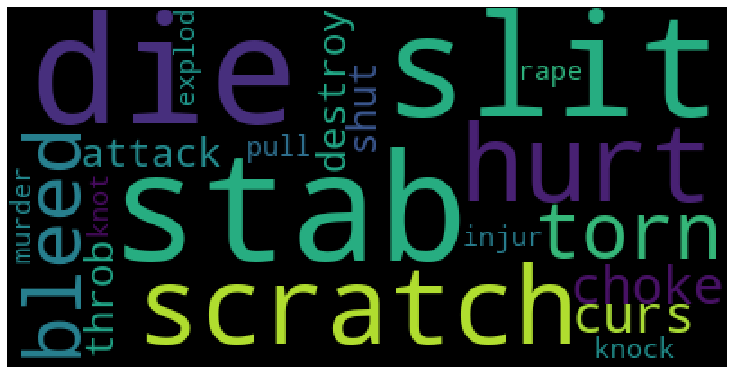

In [72]:
word="kill"


if word in words:
    str1=""
    for i in model.wv.most_similar(word,topn=20):
        str1+=" " + i[0]+ " "

    wordcloud = WordCloud().generate(str1) 
    plt.figure(figsize=(10,7)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

else:
    print("word not in vocabulary") 

In [73]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 248736


In [74]:
tokenizer.word_index

{'go': 1,
 'get': 2,
 'day': 3,
 'good': 4,
 'work': 5,
 'like': 6,
 'love': 7,
 'quot': 8,
 'today': 9,
 'time': 10,
 'got': 11,
 'thank': 12,
 'lol': 13,
 'one': 14,
 'want': 15,
 'back': 16,
 'miss': 17,
 'u': 18,
 'know': 19,
 'see': 20,
 'think': 21,
 'feel': 22,
 'im': 23,
 'realli': 24,
 'amp': 25,
 'night': 26,
 'hope': 27,
 'watch': 28,
 'still': 29,
 'need': 30,
 'make': 31,
 'well': 32,
 '2': 33,
 'new': 34,
 'home': 35,
 'oh': 36,
 'look': 37,
 'come': 38,
 'much': 39,
 'last': 40,
 'twitter': 41,
 'morn': 42,
 'tomorrow': 43,
 'wish': 44,
 'great': 45,
 'sad': 46,
 'sleep': 47,
 '3': 48,
 'wait': 49,
 'haha': 50,
 'fun': 51,
 'bad': 52,
 'week': 53,
 'tri': 54,
 'follow': 55,
 'right': 56,
 'happi': 57,
 'would': 58,
 'thing': 59,
 'friend': 60,
 'sorri': 61,
 'tonight': 62,
 'say': 63,
 'way': 64,
 'take': 65,
 'though': 66,
 'gonna': 67,
 'nice': 68,
 'better': 69,
 'hate': 70,
 'even': 71,
 'yeah': 72,
 'bed': 73,
 'tweet': 74,
 'could': 75,
 'start': 76,
 'school': 77,

In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

In [ ]:
x_test.shape

In [43]:
labels = train_df.label.unique().tolist()
labels

[0, 1]

In [45]:
decode_map = {0: "NOT HATE", 1: "HATE"}
def decode_sentiment(label):
    return decode_map[int(label)]

train_df.label = train_df.label.apply(lambda x: decode_sentiment(x))



In [46]:
train_df

,label,tweet,tweet1
id,,,
1,NOT HATE,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
2,NOT HATE,@user @user thanks for #lyft credit i can't us...,user thank lyft credit use caus offer wheelcha...
3,NOT HATE,bihday your majesty,bihday majesti
4,NOT HATE,#model i love u take with u all the time in ...,model love u take u time ur
5,NOT HATE,factsguide: society now #motivation,factsguid societi motiv
...,...,...,...
31958,NOT HATE,ate @user isz that youuu?ðððððð...,ate user isz youuu
31959,NOT HATE,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...
31960,NOT HATE,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad
